In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:, 3:5] 

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

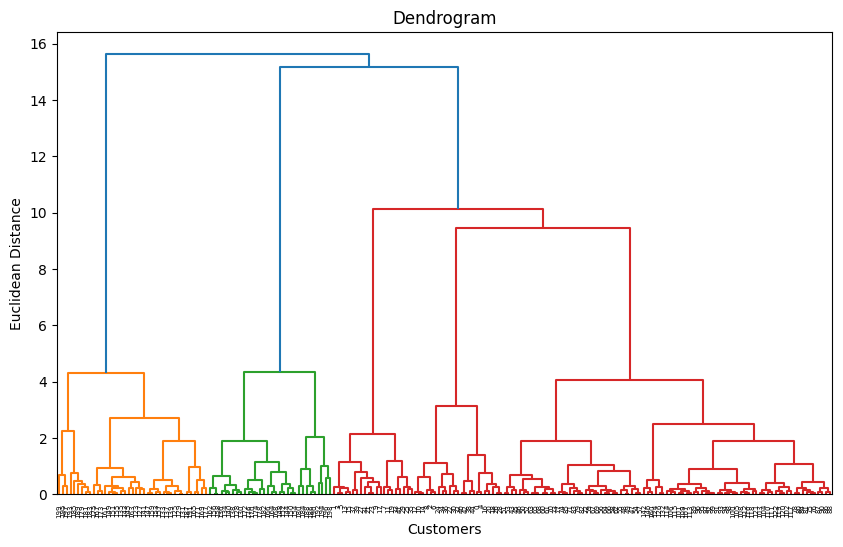

In [5]:
plt.figure(figsize=(10, 6))
dendrogram(
    linkage(X_scaled, method='ward')
)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [6]:
hc = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',
    linkage='ward'
)

clusters = hc.fit_predict(X_scaled)

In [7]:
df['Cluster'] = clusters
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


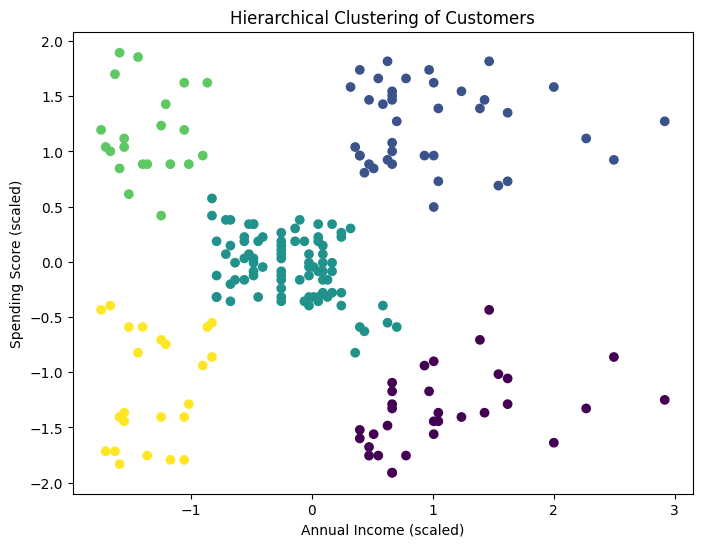

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.title("Hierarchical Clustering of Customers")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

In [9]:
import numpy as np

centroids = []
for i in range(len(set(clusters))):
    centroids.append(X_scaled[clusters == i].mean(axis=0))

centroids = np.array(centroids)

In [10]:
import pickle

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the centroids
with open("centroids.pkl", "wb") as f:
    pickle.dump(centroids, f)

print("✅ Model saved successfully")

✅ Model saved successfully
